In [1]:
%reset -f

import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.optimize import minimize

np.set_printoptions(suppress=True)  #suppress scientific notation numpy
pd.set_option("display.max_columns",None) #show all columns
pd.set_option("display.max_rows",None) #show all columns

In [2]:
df1=pd.read_csv('dataset/wheat-farm.csv')

In [10]:

df2=df1.copy()
#display(df2)
df2=df1[['Province','County','Province_number','CountyCode','LongitudeDegree','LatitudeDegree','ECwatirrig_dsm'
         ,'SoilTexture1Light2Normal3Heavy','effective_rain_fao_currentyear_mm','leeching_need_percent'
         ,'water_vol_m3ha','GrowthLength150200_123','number_of_irrig','yield_kgha','yield_county']].copy()
display(df2)


,Province,County,Province_number,CountyCode,LongitudeDegree,LatitudeDegree,ECwatirrig_dsm,SoilTexture1Light2Normal3Heavy,effective_rain_fao_currentyear_mm,leeching_need_percent,water_vol_m3ha,GrowthLength150200_123,number_of_irrig,yield_kgha,yield_county
0,Ardebil,ParsabadMoqan,1,1,47.880000,39.540000,1.1,3,46,3,4059,3,16,4743,5737
1,Ardebil,ParsabadMoqan,1,1,47.880000,39.540000,1.1,3,50,3,3803,3,17,4934,5737
2,Ardebil,ParsabadMoqan,1,1,47.700000,39.530000,1.1,3,117,3,5085,3,4,5546,5737
3,Ardebil,ParsabadMoqan,1,1,47.780000,39.610000,1.2,3,89,3,7905,3,5,6000,5737
4,Ardebil,ParsabadMoqan,1,1,47.970000,39.560000,1.1,3,65,3,8867,2,6,6000,5737
5,Ardebil,ParsabadMoqan,1,1,47.960000,39.600000,1.0,3,65,3,6920,3,4,7200,5737
6,Khuzestan,Behbahan,2,2,49.981050,30.423470,3.9,3,110,12,2884,1,12,2000,3935
7,Khuzestan,Behbahan,2,2,50.193710,30.704770,1.7,3,190,5,4160,2,4,2925,3935
8,Khuzestan,Behbahan,2,2,50.117040,30.666090,2.6,3,110,8,4363,1,5,2941,3935
9,Khuzestan,Behbahan,2,2,50.171370,30.684550,1.7,3,119,5,4030,2,5,2983,3935


In [11]:


x_province=df2['Province_number'].to_numpy()
x_ecwat = df2['ECwatirrig_dsm'].to_numpy()
x_soil = df2['SoilTexture1Light2Normal3Heavy'].to_numpy()
x_rain = df2['effective_rain_fao_currentyear_mm'].to_numpy()
x_wat = df2['water_vol_m3ha'].to_numpy()
x_gd = df2['GrowthLength150200_123'].to_numpy()
x_ie = df2['number_of_irrig'].to_numpy()
x_leech=df2['leeching_need_percent'].to_numpy()
x_long=df2['LongitudeDegree'].to_numpy()
x_lat=df2['LatitudeDegree'].to_numpy()
x_county=df2['CountyCode'].to_numpy()
ycounty=df2['yield_county'].to_numpy()
y = df2['yield_kgha'].to_numpy()



#N=len(y)
x=np.c_[x_province,x_ecwat,x_soil,x_rain,x_wat,x_gd,x_ie,x_leech,x_long,x_lat]
province=df2['Province'].astype(str).values.tolist()
county=df2['County'].astype(str).values.tolist()

In [12]:
#province_unique= list(set(province))
#for i in range(8):
    #print(province_unique[i],province.count(province_unique[i]))

In [13]:
NProv=12
province_unique= [None] *NProv

for i in range(1,NProv+1):
    province_unique[i-1]=province[np.where(x_province==i)[0][0]]

for i in range(NProv):
    print(i+1,province_unique[i],np.count_nonzero(x_province==i+1))

1 Ardebil 6
2 Khuzestan 55
3 KhorasanRazavi 43
4 Fars 48
5 Kerman 11
6 Kermanshah 8
7 Hamedan 10
8 EastAzarbayjan 14
9 WestAzarbayjan 9
10 Semnan 12
11 Qazvin 12
12 Golestan 13


In [14]:
Ncounty=41
county_unique=[None]*Ncounty
for i in range(1,Ncounty+1):
    county_unique[i-1]=county[np.where(x_county==i)[0][0]]

for i in range(Ncounty):
    print(i+1,county_unique[i],np.count_nonzero(x_county==i+1))

1 ParsabadMoqan 6
2 Behbahan 31
3 Bavi 2
4 Ahvaz 2
5 Hamidieh 2
6 DashtAzadegan 6
7 Shush 10
8 Kharkheh 2
9 Jovain 6
10 Neishabur 12
11 Zabarkhan 3
12 TorbatJam 8
13 Fariman 7
14 Mashhad 2
15 Golbahar 5
16 Marvdasht 5
17 Eghlid 8
18 Lamerd 6
19 Khonj 7
20 Fasa 2
21 FirouzAbad 5
22 Darab 15
23 RudbarJonub 2
24 Anbarabad 5
25 Faryab 4
26 Kermanshah 8
27 Razan 7
28 Dargazin 3
29 Bonab 14
30 Urmiah 5
31 Bukan 1
32 Naqadeh 3
33 Semnan 1
34 Damqan 2
35 Garmsar 2
36 Shahrud 5
37 Miami 2
38 Abyek 6
39 BoyeenZahra 6
40 Gorgan 8
41 GonbadKavous 5


10000*a[0]*(x_wat/10000)**a[1]*(x_rain/300)**a[2]*(x_ie/10)**a[3]*(x_ecwat/1.5)**a[4]*(x_gd/3)**a[5]*(1+x_leech/100)**a[6]*(x_soil/3)**a[7]*(x_lat/40)**a[8]*(x_long/60)**a[9]
[ 0.797  0.233  0.131  0.052  0.032  0.218 -1.663  0.092  0.     0.   ]


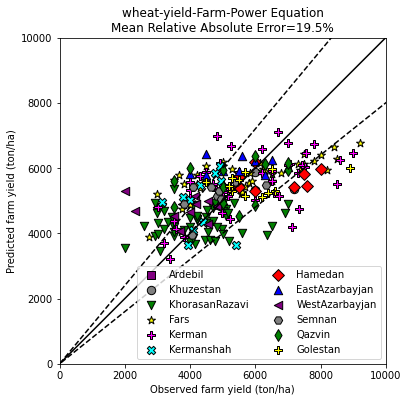

In [34]:



a = [1.358, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

def func1(a,x):
    
    x_province=x[:,0]
    x_ecwat = x[:,1]
    x_soil = x[:,2]
    x_rain =x[:,3]
    x_wat = x[:,4]
    x_gd = x[:,5]
    x_ie = x[:,6]
    x_leech=x[:,7]
    x_long=x[:,8]
    x_lat=x[:,9]
    
    return 10000*a[0]*(x_wat/10000)**a[1]*(x_rain/300)**a[2]*(x_ie/10)**a[3]*(x_ecwat/1.5)**a[4]*(x_gd/3)**a[5]*(1+x_leech/100)**a[6]*(x_soil/3)**a[7]#*(x_lat/40)**a[8]*(x_long/60)**a[9]




func2= lambda a: np.dot(y-func1(a,x),y-func1(a,x))/50**2


res = minimize(func2,a)
a=np.round(res.x,3)

print("10000*a[0]*(x_wat/10000)**a[1]*(x_rain/300)**a[2]*(x_ie/10)**a[3]*(x_ecwat/1.5)**a[4]*(x_gd/3)**a[5]*(1+x_leech/100)**a[6]*(x_soil/3)**a[7]*(x_lat/40)**a[8]*(x_long/60)**a[9]")
print(a[0:10])


#y1=32000*(-0.067+0.213*x_wat/11000+0.796*x_y1/20000)

yhat=func1(a,x)


fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(6, 6)

markers_=['s','o','v','*','P','X','D','^','<','H','d','P','X','D']
colors_=['purple','gray','green','yellow','magenta','cyan','red','blue','purple','gray','green','yellow']

for i in range(NProv):
    cond=x_province==i
    m=ax.scatter(y[cond], yhat[cond],marker=markers_[i],label=province_unique[i],s=70,edgecolor='k',facecolor=colors_[i])

#ax.scatter(y,y_hat_lin1)
ax.legend(loc='lower right',ncol=2)

ax.plot(np.array([0,100000]),np.array([0,100000]), 'k-')
ax.plot(np.array([100000,0,100000]),np.array([120000,0,80000]), 'k--')
ax.set_xlabel('Observed farm yield (ton/ha)')
ax.set_ylabel('Predicted farm yield (ton/ha)')
ax.set_xlim(left=0,right=10000)
ax.set_ylim(bottom=0,top=10000)
ax.set_aspect('equal')
R2=np.round(r2_score(y,yhat),3)

err_percent=np.round(np.mean(np.abs(yhat-y)/y),3)*100

ax.set_title("wheat-yield-Farm-Power Equation\nMean Relative Absolute Error="+str(err_percent)+"%")
fig.savefig('fig/wheat_farm_yield.png', dpi=300)




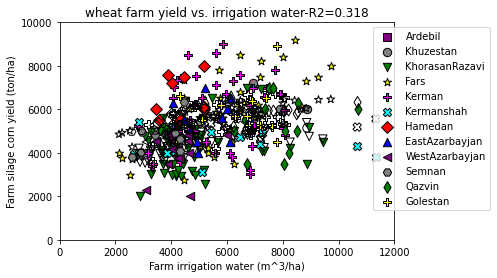

In [23]:
for i in range(NProv):
    cond=x_province==i
    plt.scatter(x_wat[cond], y[cond],marker=markers_[i],label=province_unique[i],s=70,edgecolor='k',facecolor=colors_[i])
    plt.scatter(x_wat[cond], yhat[cond],marker=markers_[i],s=70,facecolor='none',edgecolor='k')
    
    
plt.xlabel('Farm irrigation water (m^3/ha)')
plt.ylabel('Farm silage corn yield (ton/ha)')
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right', ncol=1)
plt.xlim(left=0,right=12000)
plt.ylim(bottom=0,top=10000)

plt.title("wheat farm yield vs. irrigation water-R2="+str(R2))
fig.savefig('fig/wheat_farm_yield_vs_irrigwat.png', dpi=300)

In [24]:
a

array([248.397,   0.219,   0.108,   0.064,  -0.055,   0.219,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ])

In [25]:
np.round(np.mean(np.abs(ycounty-y)/y),3)*100

15.6

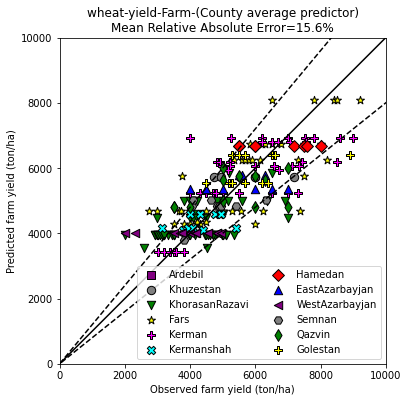

In [26]:

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(6, 6)



for i in range(NProv):
    cond=x_province==i
    m=ax.scatter(y[cond], ycounty[cond],marker=markers_[i],label=province_unique[i],s=70,edgecolor='k',facecolor=colors_[i])

#ax.scatter(y,y_hat_lin1)
ax.legend(loc='lower right',ncol=2)

ax.plot(np.array([0,100000]),np.array([0,100000]), 'k-')
ax.plot(np.array([100000,0,100000]),np.array([120000,0,80000]), 'k--')
ax.set_xlabel('Observed farm yield (ton/ha)')
ax.set_ylabel('Predicted farm yield (ton/ha)')
ax.set_xlim(left=0,right=10000)
ax.set_ylim(bottom=0,top=10000)
ax.set_aspect('equal')
R2=np.round(r2_score(y,ycounty),3)

err_percent=np.round(np.mean(np.abs(ycounty-y)/y),3)*100

ax.set_title("wheat-yield-Farm-(County average predictor)\nMean Relative Absolute Error="+str(err_percent)+"%")
fig.savefig('fig/wheat_farm_yield_county_avg.png', dpi=300)


